<a href="https://colab.research.google.com/github/sohelshekhatik1998/DATATHON-/blob/main/Comparing_ML_algorithms_on_PIMA_Diabetes_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Hey there!**

This notebook will be dealing with comparing some basic Machine Learning classification algorithms based on their accuracy. So, lets get started! 

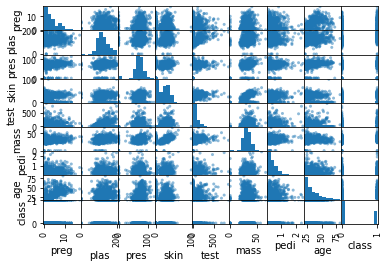

Shape of Data is ==>  (768, 9)


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Will list the files in the input directory
#import os
#print(os.listdir("../input"))

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=names)
scatter_matrix(data)
plt.show()
print("Shape of Data is ==> ",data.shape)

Getting to know your data well be of great help...Lets dive into the dataset and see what are the columns we will be dealing with.

In [ ]:
df = pd.read_csv("/home/mec/Desktop/Old Semester/diabetes.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Data is related to healthcare Industry having 768 observations with 9 variables. 
Target variable is Outcome. 
Boolean, float, integers are different datatypes available. 
Well descriptive analysis shows that variable Glucose, BoodPressure, SkinThickness, Insulin and BMI 
have minimum value 0 which does not make any sense, these values are either missing or outliers, 
Let's see the actual statistics of Data. 
I can see in Pregnancies column, minimum is 0 (May be this is sign for no pregnancy) which is considerable, 
But maximum month of pregnancy is 17 which does not make any sense. 
Variance among different input variables is very large. 
Scaling data will be helpful for Predective modelling.

In [ ]:
df.rename({'DiabetesPedigreeFunction':'DPF'},inplace = True,axis =1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Hmm..Looks like it is a supervised learning problem as we have predictor variables and one dependent variable(class).

To get the total number of classes we have in the 'class' column and count of each class, countplot might help us...

<AxesSubplot:xlabel='Outcome', ylabel='count'>

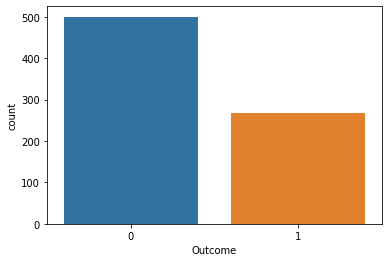

In [ ]:
import seaborn as sns
sns.countplot(x=df['Outcome'])

Yeah...We have 2 classes(0,1) in which our data is classified..

Now lets seeHow is the distribution of my data along diffrent rows?

In [ ]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Looks like the data is clean...But..Wait a minute..
Is the data really clean?

What about the values that are "0"?...Insulin of a person cant be 0 right...
Obviously!

Lets clean it up...To do it in a easy way, replace all zeros from all predictor variables(except Pregnancies) by NaN...This represents that we have got a missing value...Fix it!!

Text(0, 0.5, 'Frequency')

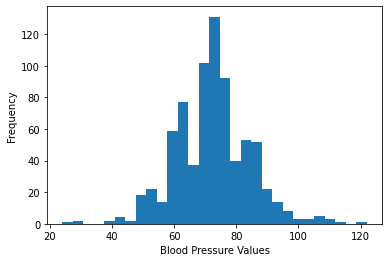

In [ ]:
n, bins, patches = plt.hist(x=df['BloodPressure'],bins='auto')
plt.xlabel('Blood Pressure Values')
plt.ylabel('Frequency')

In [ ]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)
df.head() #Replaced all 0 values by NaN so it is easy to clean the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


We can replace missing values by using various methods like mean,median,mode or the number of your choice...We'll do that with mean...You can rather try diffrent imputation methods...And let me know if something works better..

In [ ]:
def drop_column_values(data, column_name, value):
    '''
    Delete certain dataframe rows based on the value of a certain column element
    '''
    # Get names of indexes for which column Age has value 30
    indices = data[ data[column_name] == value ].index

    # Delete these row indexes from dataFrame
    data.drop(indices , inplace = True)

# drop erroneous rows
for cname in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    drop_column_values(data, cname, 0)

print(data.describe())

In [ ]:
df.fillna(df.mean(), inplace = True) #Filled Mising values with Mean (Imputation)
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Feature Selection**

To increase the efficiency of the model, we can eliminate some features. This is done by knowing the importance if a particular feature...

Lets try to find correlation between the features of our dataset..More the features are correlated, we can eliminate one of them...Heatmap folks!!

<AxesSubplot:title={'center':'Scaled Data'}>

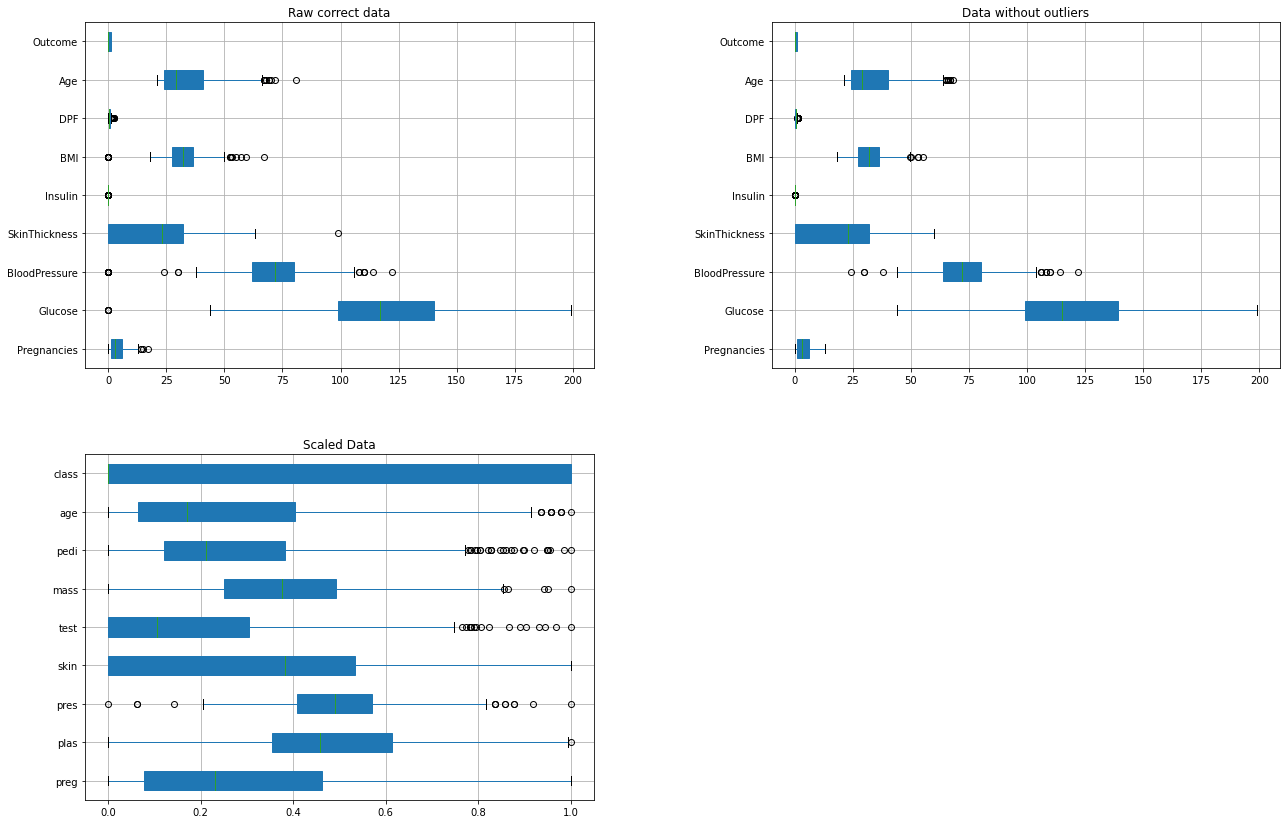

In [ ]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
data=df
# plot raw data
fig = plt.figure(figsize = (20, 12))
plt.subplots_adjust(left = 0.12, right = 0.95, bottom = 0.05, top = 0.95,
                    wspace = 0.35, hspace = 0.25)
plt.subplot(2, 2, 1)
plt.title('Raw correct data')
data.boxplot(vert = False, labels = names, patch_artist = True)

# remove outliers and plot results
plt.subplot(2, 2, 2)
plt.title('Data without outliers')
data['Insulin'] = data['Insulin'] * .001
data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]
data.boxplot(vert = False, labels = names, patch_artist = True)

# scale data and plot results
plt.subplot(2 , 2, 3)
plt.title('Scaled Data')
scaler = MinMaxScaler(feature_range=(0, 1))
data   = pd.DataFrame(scaler.fit_transform(data.values),  columns = names)
data.boxplot(vert = False, labels = names, patch_artist = True)


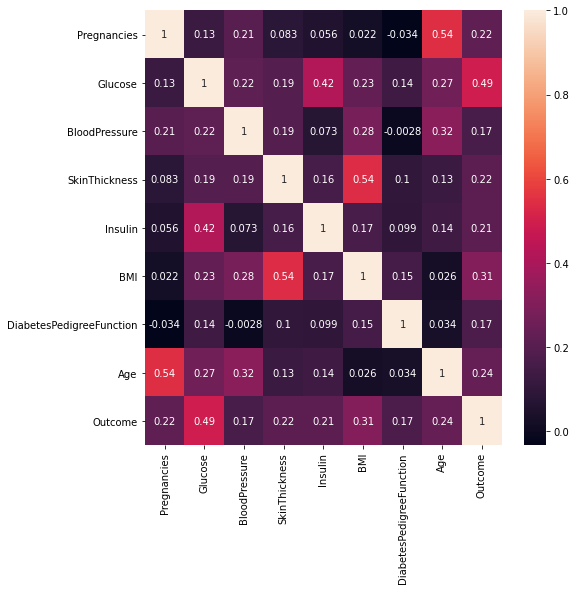

In [ ]:
import matplotlib.pyplot as plt #seaborn
sns.heatmap(df.corr(),annot=True)
fig = plt.gcf()
fig.set_size_inches(8,8)

The heatmap is not informative enough...Lets try another way....Use random forest to get the importances of feature...#SVM-RFE

In [ ]:
#feature selection
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
x=df[df.columns[:8]]
y=df.Outcome
clf.fit(x,y)
feature_imp = pd.DataFrame(clf.feature_importances_,index=x.columns)
feature_imp.sort_values(by = 0 , ascending = False)

,0
Glucose,0.250677
BMI,0.164124
Age,0.138385
DiabetesPedigreeFunction,0.125907
Insulin,0.088827
BloodPressure,0.082721
Pregnancies,0.078134
SkinThickness,0.071224


In [ ]:
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

for i in range(2,7):
    rfe = RFE(estimator=RandomForestClassifier(),n_features_to_select=i, verbose=0)
    rfe.fit(x_train_std,y_train)
    print(f"Accuracy with Feature {i} ==>",metrics.accuracy_score(y_test, rfe.predict(x_test_std)))

Accuracy with Feature 2 ==> 0.7662337662337663
Accuracy with Feature 3 ==> 0.7857142857142857
Accuracy with Feature 4 ==> 0.7792207792207793
Accuracy with Feature 5 ==> 0.7987012987012987
Accuracy with Feature 6 ==> 0.7987012987012987


So as we can see... The first 5 features (even including the 6th feature) displayed maybe important for us...We might neglect the rest...

Now get your tools ready to sculpt diffrent models... 

In [ ]:
print("Important Features are ==> ",list(df.columns[:8][rfe.support_]))

Important Features are ==>  ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DPF', 'Age']


In [ ]:
from sklearn.model_selection import train_test_split
features = df[["Glucose",'BMI','Age','DiabetesPedigreeFunction']]
labels = df.Outcome
features.head()

,Glucose,BMI,Age,DiabetesPedigreeFunction
0,148.0,33.6,50,0.627
1,85.0,26.6,31,0.351
2,183.0,23.3,32,0.672
3,89.0,28.1,21,0.167
4,137.0,43.1,33,2.288


These are five models we will be seeing...Split the work and get your hands dirty to code the hell up!!

Note that we have used stratification while splitting so that our data gets splitted in proportion with respect to Outcome column.

In [ ]:
features_train,features_test,labels_train,labels_test = train_test_split(features,labels,stratify=df.Outcome,test_size=0.4)

I'll like to start with **Decision Trees**

In [ ]:
#DTClassifier
from sklearn.tree import DecisionTreeClassifier 
dtclf = DecisionTreeClassifier()
dtclf.fit(features_train,labels_train)
dtclf.score(features_test,labels_test)

0.7045454545454546

Looks fine...Lets see what Support Vector Machine shows
**SVM**
Try to change kernel parameter to other than "linear"..

In [ ]:
#SVM
from sklearn import svm
clf = svm.SVC(kernel="linear")
clf.fit(features_train,labels_train)
clf.score(features_test,labels_test)

0.7564935064935064

Will Gaussian **Naive Bayes** do well?

In [ ]:
#Naive Bayes Classifier
from sklearn import naive_bayes
nbclf = naive_bayes.GaussianNB()
nbclf.fit(features_train,labels_train)
nbclf.score(features_test,labels_test)

0.7564935064935064

Good...Better than Decision Tree...**K Neighbor?**

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knnclf = KNeighborsClassifier(n_neighbors=2)
knnclf.fit(features_train,labels_train)
print(knnclf.score(features_test,labels_test))
    
 

0.724025974025974


Cool...Now the last one remaining...Lets do **Logistic Regression**

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression()
clf1.fit(features_train,labels_train)
clf1.score(features_test,labels_test)

0.7662337662337663

You know what?...I will like to see all these algo's accuracy at one place...Also, lets code everything up in single cell itself..

In [ ]:
algos = ["Support Vector Machine","Decision Tree","Logistic Regression","K Nearest Neighbor","Naive Bayes"]
clfs = [svm.SVC(kernel="linear"),DecisionTreeClassifier(),LogisticRegression(),KNeighborsClassifier(n_neighbors=2),naive_bayes.GaussianNB()]
result = []

for clff in clfs:
    clff.fit(features_train,labels_train)
    acc = clff.score(features_test,labels_test)
    result.append(acc)
result_df = pd.DataFrame(result,index=algos)
result_df.columns=["Accuracy"]
result_df.sort_values(by="Accuracy",ascending=False)

,Accuracy
Logistic Regression,0.766234
Support Vector Machine,0.756494
Naive Bayes,0.756494
K Nearest Neighbor,0.724026
Decision Tree,0.714286


Great...Looks neat..Also I can see that which models are looking well in terms of accuracy...But did u guys noticed?..We have been working on same training and testing set from a long time..We need to ry diffrent combinations of training and testing sets...Lets bring Cross Validation into picture to help me out! 

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold =KFold(n_splits=10)


By using cross validation, we will be splitting our dataset into 10 equal parts...We keep one part for testing our algorithm and we train models on the rest...Now these parts that we divided the dataset into, keeps interchanging to form diffrent combinations of training and testing data...We get difffrent accuracy score for each combination...This is done by cross_val_score()..It gives us the list of diffrent accuracies...Now by taking the mean of this score, we can find the general accuracy of our model...
This gives a generalised output..#Paired T-Test, Wilcoxon Test,  

In [ ]:
algos = ["Support Vector Machine","Decision Tree","Logistic Regression","K Nearest Neighbor","Naive Bayes"]
clfs = [svm.SVC(kernel="linear"),DecisionTreeClassifier(),LogisticRegression(),KNeighborsClassifier(n_neighbors=2),naive_bayes.GaussianNB()]
cv_results=[]
for classifiers in clfs:
    cv_score = cross_val_score(classifiers,features,labels,cv=kfold,scoring="accuracy")
    cv_results.append(cv_score.mean())
cv_mean = pd.DataFrame(cv_results,index=algos)
cv_mean.columns=["Accuracy"]
cv_mean.sort_values(by="Accuracy",ascending=False)

,Accuracy
Naive Bayes,0.776042
Logistic Regression,0.773394
Support Vector Machine,0.770796
K Nearest Neighbor,0.706955
Decision Tree,0.704357


And now....We can see the accuracy changed a bit this time...It is because we have done cross validation and trained and tested the algorithms on diffrent combinations of data....
From the above output, it is clear that for this dataset, SVM, Logistic Regression and Naive Bayes works better....

In [ ]:
import xgboost as xgb #CatBoost,LightGBM 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

xgbcl = xgb.XGBClassifier(silent=True,verbosity = 0)

param_grid = {'booster':['gbtree','gblinear'],
             'colsample_bytree':[0.4,0.6,0.8,1],
             'learning_rate':[0.01,0.1,0.2,0.4],
             'max_depth':[2,3,4,6],
             'n_estimators':[200,300,400,500],
              'subsample':[0.4,0.6,0.8,1]}

grid_xgb = RandomizedSearchCV(xgbcl,param_grid,n_iter=30,scoring='accuracy',cv = 10,refit = True)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

ss = StandardScaler()
x_train_std = ss.fit_transform(x_train)
x_test_std = ss.transform(x_test)

#grid_knn = GridSearchCV(xgbcl,param_grid,scoring='accuracy',cv = 10,refit = True)
grid_xgb.fit(x_train_std,y_train)
print("Best Score ==> ", grid_xgb.best_score_)
print("Tuned Paramerers ==> ",grid_xgb.best_params_)
print("Accuracy on Train set ==> ", grid_xgb.score(x_train_std,y_train))
print("Accuracy on Test set ==> ", grid_xgb.score(x_test_std,y_test))

(614, 8)
(154, 8)
(614,)
(154,)
Best Score ==>  0.7556054997355897
Tuned Paramerers ==>  {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.2, 'colsample_bytree': 0.8, 'booster': 'gblinear'}
Accuracy on Train set ==>  0.7671009771986971
Accuracy on Test set ==>  0.8116883116883117


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

classifier.add(Dense(units= 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))
classifier.add(Dense(units= 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(x_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
62/62 [==============================] - 0s 596us/step - loss: 0.6837 - accuracy: 0.6384
Epoch 2/100
62/62 [==============================] - 0s 587us/step - loss: 0.6724 - accuracy: 0.6401
Epoch 3/100
62/62 [==============================] - 0s 603us/step - loss: 0.6679 - accuracy: 0.6401
Epoch 4/100
62/62 [==============================] - 0s 693us/step - loss: 0.6654 - accuracy: 0.6401
Epoch 5/100
62/62 [==============================] - 0s 639us/step - loss: 0.6593 - accuracy: 0.6401
Epoch 6/100
62/62 [==============================] - 0s 707us/step - loss: 0.6564 - accuracy: 0.6401
Epoch 7/100
62/62 [==============================] - 0s 687us/step - loss: 0.6469 - accuracy: 0.6401
Epoch 8/100
62/62 [==============================] - 0s 675us/step - loss: 0.6396 - accuracy: 0.6498
Epoch 9/100
62/62 [==============================] - 0s 739us/step - loss: 0.6315 - accuracy: 0.6710
Epoch 10/100
62/62 [==============================] - 0s 881us/step - loss: 0.6234 - accura

In [ ]:
y_pred_test = classifier.predict(x_test_std)
y_pred_test=y_pred_test>0.5

y_pred_train = classifier.predict(x_train_std)
y_pred_train=y_pred_train>0.5

print("Accuracy on Train Set ==> ",metrics.accuracy_score(y_train,y_pred_train))
print("Accuracy on Test Set ==> ",metrics.accuracy_score(y_test,y_pred_test))

Accuracy on Train Set ==>  0.6400651465798045
Accuracy on Test Set ==>  0.6948051948051948


So to revise what we did above:

1.Cleaned our data by replacing missing values(for this data, we considered 0 as a missing value).
2.Feature Selection using Random Forest Classifier.
3.Split the data into training and testing sets using train_test_split.
4.Trained five diffrent classification algorithms and found their accuracies.
5.Cross validation by splitting data into 10 splits to get the generalised accuracy for each algorithm.